In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk import FreqDist
import nltk
#nltk.download('punkt')
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
import os

# Topic Modeling

#### Reading and preprocessing data of 50 files

In [ ]:
import os
path=os.listdir('.')
#print(path)
file_list=[]
for i in range(1,55):
    file_name=result = list(filter(lambda x: x.startswith(str(i)),path))
    file_list.extend(file_name)


In [ ]:
file_list=list(set(file_list))

In [ ]:
folder_name='.'
path=os.listdir(folder_name)
data_files=[]
for file in file_list:
    #file_path =   folder_name +'/' + file # Replace with your file path
    #print(file_path)
    try:
        file_r = open(file, 'r')
        data_files.append(file_r.read().replace('\n', ' '))
    except:
        print('file read error')



In [ ]:
df_files_orig=pd.DataFrame(data_files, columns=['Text'])

In [ ]:
len(data_files)

50

In [ ]:
df_files_orig.dtypes

,0
Text,object


In [ ]:
df_files_orig

,Text
0,ITEM 5 INITIAL FEES Initial Franchise Fee Unde...
1,ITEM 5 INITIAL FEES Initial Franchise Fee You ...
2,Item 5 INITIAL FEES If you are purchasing a ...
3,Item 5 INITIAL FEES License Agreement You must...
4,ITEM 5: INITIAL FEES Franchise Agreement Initi...
5,Item 5 INITIAL FEES Chick-fil-A does not cha...
6,ITEM 5 INITIAL FEES Initial Franchise Fees. ...
7,ITEM 5 INITIAL FEES Development Agreement: ...
8,ITEM 5 INITIAL FEES The initial franchise fee ...
9,ITEM 5 INITIAL FEES Development Fee If you en...


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import spacy
import re

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def preprocess_and_lemmatize(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process the text
    doc = nlp(text)

    # Preprocess and lemmatize
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop]

    return ' '.join(lemmatized_tokens)

# Example usage
# text = "The quick brown foxes are jumping over the lazy dogs."
# result = preprocess_and_lemmatize(text)
# print(result)
df_files = df_files_orig.copy()
df_files['Text'] = df_files_orig['Text'].apply(lambda x: preprocess_and_lemmatize(x))

In [ ]:
df_files['Text']

,Text
0,item initial fee initial franchise fee franchi...
1,item initial fee initial franchise fee pay ini...
2,item initial fee purchase residential real est...
3,item initial fee license agreement pay viocf l...
4,item initial fee franchise agreement initial f...
5,item initial fee chickfila charge initial lice...
6,item initial fee initial franchise fee initial...
7,item initial fee development agreement sign de...
8,item initial fee initial franchise fee type sh...
9,item initial fee development fee enter develop...


### Bag of Words and LDA Model

In [ ]:
text_list=df_files['Text'].apply(lambda x:x.split(' '))


In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc


# Create a dictionary from the preprocessed data

dictionary = Dictionary(text_list)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in text_list]

# Train the LDA model
num_topics = 6
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=50, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['area', 'construction', 'service', 'real', 'estate', 'dollar', 'renewal', 'office', 'market', 'team']
Topic: 1
Words: ['center', 'service', 'product', 'license', 'supply', 'assistance', 'andor', 'waiver', 'exhibit', 'disclosure']
Topic: 2
Words: ['nro', 'traditional', 'qualify', 'march', 'store', 'multibrand', 'territory', 'participate', 'marketing', 'amendment']
Topic: 3
Words: ['center', 'discount', 'store', 'transfer', 'system', 'veteran', 'document', 'territory', 'complete', 'lease']
Topic: 4
Words: ['deposit', 'company', 'refund', 'franchised', 'area', 'license', 'inventory', 'equipment', 'exhibit', 'sale']
Topic: 5
Words: ['marketing', 'franchised', 'support', 'month', 'area', 'fund', 'transfer', 'acquire', 'operation', 'royalty']


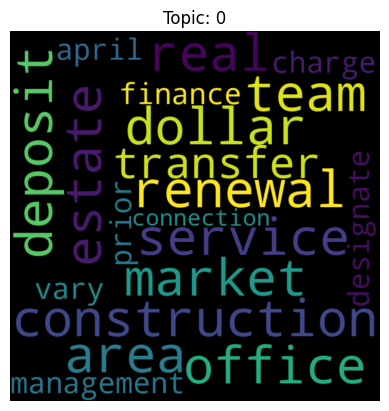

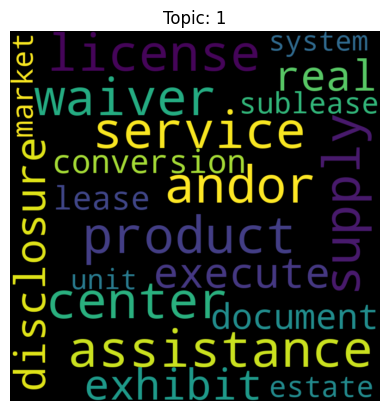

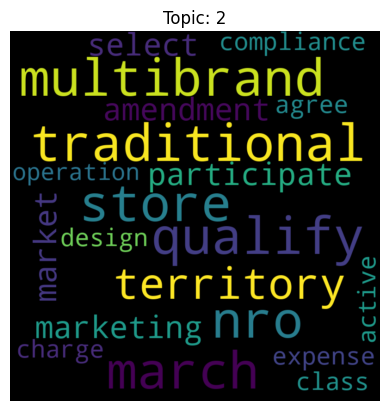

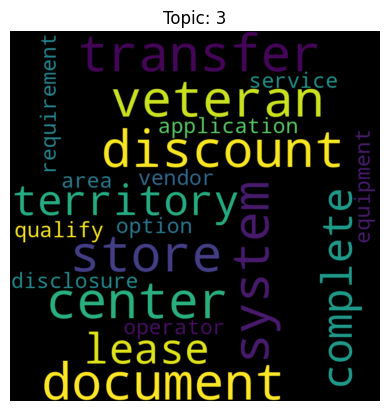

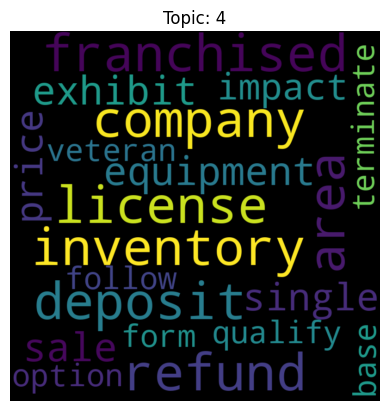

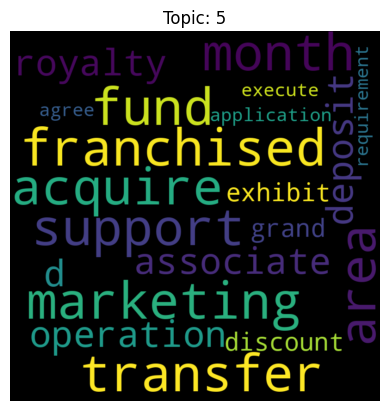

In [ ]:
# Plotting a wordcloud of the topics

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

## Method 2 : TFIDF and LDA

In [ ]:
import gensim

from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases

import gensim.corpora as corpora

from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Create Dictionary
data_lemmatized=list(text_list.values)
id2word = corpora.Dictionary(data_lemmatized)
print('Total Vocabulary Size:', len(id2word))

#text=list(df_files['Text'].values)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
dictionary = Dictionary(data_lemmatized)

Total Vocabulary Size: 2573


Filter out most common and least common words

In [ ]:
#create a dictionary and then convert it to a dataframe that shows each word in the corpus and its frequency
# check word frequencies in the corpus and filter out high-frequency words that are over
#a certain threshold.
#Since these are generally corpus specific or general writing words, they don’t help much to cluster topics.

dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
            if id2word[idx] in dict_corpus:
                dict_corpus[id2word[idx]] += freq
            else:
                dict_corpus[id2word[idx]] = freq
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

# top 200 high-frequency words in descending order.
dict_df.sort_values('freq', ascending=False).head(200)

,freq
fee,1443
franchise,1320
agreement,928
restaurant,847
initial,754
...,...
fund,27
personnel,27
obtain,27
opportunity,27


In [ ]:
from gensim import corpora
from gensim import models

In [ ]:
remove_words=list(dict_df[(dict_df['freq']>900) | (dict_df['freq']<3)].index)

In [ ]:
# Function to filter out most common words from a document
def filter_common_words(doc, common_words):
    return [(idx, freq) for idx, freq in doc if id2word[idx] not in common_words]

# Filter the corpus
filtered_corpus = [filter_common_words(doc, remove_words) for doc in corpus]

In [ ]:
print('Number of words removed after filtering highly frequent and very less frequent words:',len(remove_words))


Number of words removed after filtering highly frequent and very less frequent words: 1410


In [ ]:
# id2word.filter_extremes(no_below=5, no_above=0.9)
# filtered_corpus = [id2word.doc2bow(text) for text in data_lemmatized]

In [ ]:
# Get all unique word indices from the filtered corpus
unique_indices = set(idx for doc in filtered_corpus for idx, _ in doc)

# Create a new dictionary with only the words that remain after filtering
filtered_id2word = {idx: id2word[idx] for idx in unique_indices}

# If you need a gensim Dictionary object instead of a regular Python dictionary:

filtered_dictionary = corpora.Dictionary()
filtered_dictionary.id2token = filtered_id2word
filtered_dictionary.token2id = {v: k for k, v in filtered_id2word.items()}

In [ ]:
#create TFIDF corpus

model_tfidf = models.TfidfModel(filtered_corpus)
corpus_tfidf = model_tfidf[filtered_corpus]

In [ ]:
lda_model_tfidf = gensim.models.ldamodel.LdaModel(
    corpus=corpus_tfidf,
    id2word=id2word,
    chunksize=100,
    alpha=10,
    eta=0.2,
    iterations=400,
    num_topics=5,
    passes=100,
    per_word_topics=True,
    eval_every=None,
    random_state =42)

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis_data =pyLDAvis.gensim.prepare(lda_model_tfidf, filtered_corpus, id2word)
# Show the visualization in the notebook
pyLDAvis.save_html(vis_data, 'output_LDA.html')
pyLDAvis.display(vis_data)


In [ ]:
lda_model_tfidf.show_topics(formatted=False)

[(0,
  [('incentive', 0.0031322155),
   ('discount', 0.0026808959),
   ('veteran', 0.0023182735),
   ('location', 0.00208833),
   ('new', 0.0018553337),
   ('adq', 0.0018547984),
   ('associate', 0.001724747),
   ('midas', 0.0016910426),
   ('wendys', 0.0015754473),
   ('culver', 0.0015456912)]),
 (1,
  [('restaurant', 0.0052525885),
   ('store', 0.0028973925),
   ('company', 0.002516597),
   ('shop', 0.0023085545),
   ('lump', 0.0018838389),
   ('office', 0.001828098),
   ('vetfran', 0.0018010393),
   ('applicant', 0.0015628149),
   ('bhhs', 0.0014738097),
   ('exist', 0.001458897)]),
 (2,
  [('development', 0.004057979),
   ('franchised', 0.0034463678),
   ('system', 0.0022051306),
   ('nro', 0.0021710272),
   ('program', 0.0020608504),
   ('mtra', 0.0020177835),
   ('support', 0.001841005),
   ('sum', 0.0018039385),
   ('develop', 0.0017015641),
   ('unit', 0.0015964999)]),
 (3,
  [('restaurant', 0.0041279644),
   ('area', 0.002576069),
   ('deposit', 0.0025047206),
   ('purchase', 

In [ ]:

from gensim.models.coherencemodel import CoherenceModel

# Perplexity
perplexity = lda_model_tfidf.log_perplexity(filtered_corpus)


# Get topics
num_topics = lda_model_tfidf.num_topics
topics = []
# To get the topic words from the model

for topic_id, topic in lda_model_tfidf.show_topics(num_topics=10, formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)
topics[:2]



# Calculate coherence
coherence_model = CoherenceModel(model=lda_model_tfidf, dictionary=filtered_dictionary,texts=data_lemmatized, coherence='c_v')

coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")



Coherence Score: 0.4629714141115603


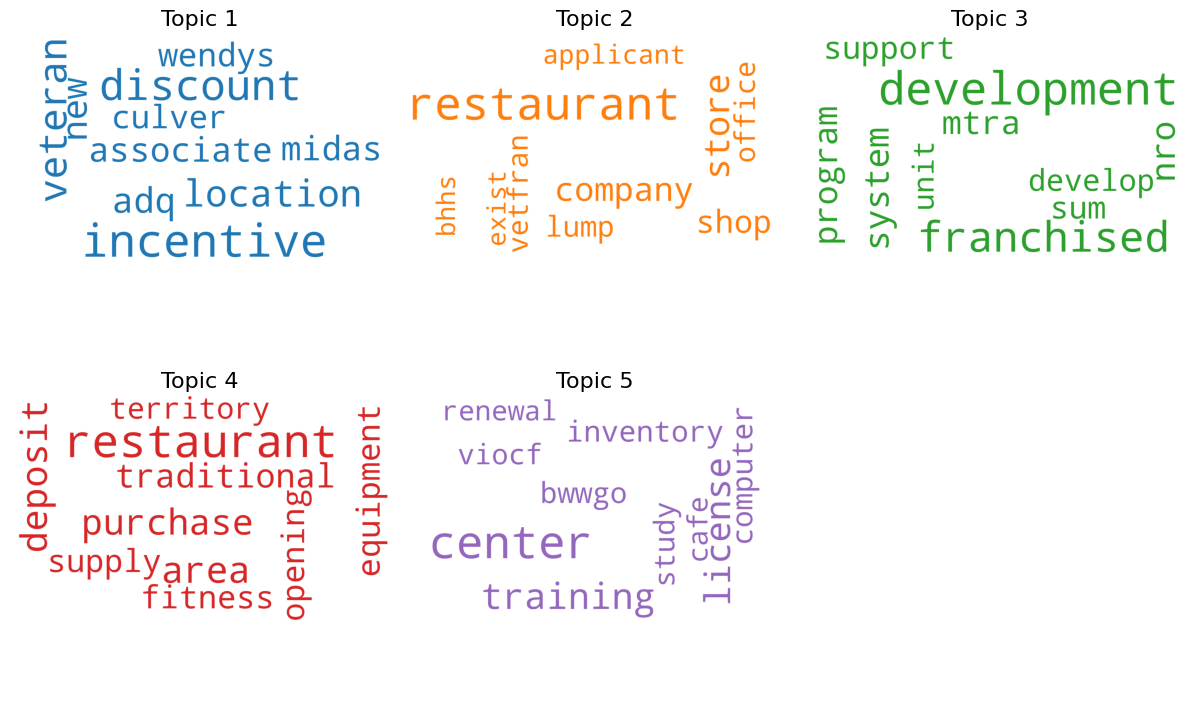

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
stop_words = set(STOPWORDS)
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1500,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=0.5)


topics = lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    if i in range(len(topics)):
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
      plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
print(lda_model_tfidf.print_topics())


[(0, '0.003*"incentive" + 0.003*"discount" + 0.002*"veteran" + 0.002*"location" + 0.002*"new" + 0.002*"adq" + 0.002*"associate" + 0.002*"midas" + 0.002*"wendys" + 0.002*"culver"'), (1, '0.005*"restaurant" + 0.003*"store" + 0.003*"company" + 0.002*"shop" + 0.002*"lump" + 0.002*"office" + 0.002*"vetfran" + 0.002*"applicant" + 0.001*"bhhs" + 0.001*"exist"'), (2, '0.004*"development" + 0.003*"franchised" + 0.002*"system" + 0.002*"nro" + 0.002*"program" + 0.002*"mtra" + 0.002*"support" + 0.002*"sum" + 0.002*"develop" + 0.002*"unit"'), (3, '0.004*"restaurant" + 0.003*"area" + 0.003*"deposit" + 0.002*"purchase" + 0.002*"traditional" + 0.002*"equipment" + 0.002*"fitness" + 0.002*"supply" + 0.002*"opening" + 0.002*"territory"'), (4, '0.005*"center" + 0.003*"training" + 0.003*"license" + 0.002*"inventory" + 0.002*"computer" + 0.002*"bwwgo" + 0.002*"study" + 0.002*"viocf" + 0.002*"cafe" + 0.002*"renewal"')]


In [ ]:
lda_model_tfidf.get_topics()

array([[0.00037633, 0.00044354, 0.00037069, ..., 0.00034884, 0.00034884,
        0.00034884],
       [0.0003721 , 0.00043378, 0.00036719, ..., 0.00034555, 0.00034555,
        0.00034555],
       [0.00036605, 0.00047898, 0.00036207, ..., 0.00034054, 0.00034054,
        0.00034054],
       [0.0003695 , 0.00042904, 0.00106602, ..., 0.00034319, 0.00034319,
        0.00034319],
       [0.00037169, 0.00043211, 0.00036894, ..., 0.00034603, 0.00034603,
        0.00034603]], dtype=float32)

In [ ]:
print([len(doc) for doc in filtered_corpus[:10]])


[269, 104, 158, 135, 228, 41, 209, 141, 134, 142]


In [ ]:
for i in range(5):
    print(lda_model_tfidf.get_document_topics(filtered_corpus[i], minimum_probability=0.0))


[(0, 0.17121556), (1, 0.15914164), (2, 0.35478202), (3, 0.21101166), (4, 0.103849076)]
[(0, 0.21938606), (1, 0.24653381), (2, 0.11777227), (3, 0.18036552), (4, 0.23594233)]
[(0, 0.19436738), (1, 0.28629458), (2, 0.12905738), (3, 0.19658595), (4, 0.1936947)]
[(0, 0.088854484), (1, 0.11777907), (2, 0.12897687), (3, 0.21078064), (4, 0.45360896)]
[(0, 0.11550864), (1, 0.14916089), (2, 0.3861176), (3, 0.16092755), (4, 0.18828532)]


In [ ]:
tfidf_corpus = lda_model_tfidf[corpus]
doc_topic_assignments = []
for doc in filtered_corpus:
    topic_dist = lda_model_tfidf.get_document_topics(doc, minimum_probability=0.0)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    doc_topic_assignments.append(dominant_topic)



In [ ]:
from collections import defaultdict
# Get dominant topic for each document
topic_to_docs = defaultdict(list)
for doc_id, doc in enumerate(filtered_corpus):
    topic_dist = lda_model_tfidf.get_document_topics(doc)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    topic_to_docs[dominant_topic].append(doc_id)

# Get top words for each topic
num_topics = lda_model_tfidf.num_topics
topic_top_words = []
for topic_id in range(num_topics):
    top_words = [word for word, _ in lda_model_tfidf.show_topic(topic_id, topn=10)]
    topic_top_words.append(top_words)



In [ ]:
print(topic_to_docs)

defaultdict(<class 'list'>, {2: [0, 4, 6, 7, 8, 9, 11, 12, 13, 18, 22, 24, 29, 32, 38, 40, 46], 1: [1, 2, 10, 17, 25, 28, 34, 35, 41, 42, 43, 49], 4: [3, 14, 15, 19, 20, 27, 36, 39], 3: [5, 21, 23, 26, 30, 31, 33, 37, 45, 47, 48], 0: [16, 44]})


In [ ]:

# Create DataFrame
import pandas as pd

topic_data = {
    'Topic': [f'Topic {i+1}' for i in range(num_topics)],
    'Document_Count': [len(docs) for docs in topic_to_docs.values()],
    'Top_Words': [', '.join(words) for words in topic_top_words],
    'Documents assigned': [topic_to_docs[i] for i in range(num_topics)]
}
df_lda = pd.DataFrame(topic_data)
df_lda['Documents assigned']=df_lda['Documents assigned'].apply(lambda x: ', '.join(['File ' + str(el) for el in x]))

In [ ]:
df_lda

,Topic,Document_Count,Top_Words,Documents assigned
0,Topic 1,17,"incentive, discount, veteran, location, new, a...","File 16, File 44"
1,Topic 2,12,"restaurant, store, company, shop, lump, office...","File 1, File 2, File 10, File 17, File 25, Fil..."
2,Topic 3,8,"development, franchised, system, nro, program,...","File 0, File 4, File 6, File 7, File 8, File 9..."
3,Topic 4,11,"restaurant, area, deposit, purchase, tradition...","File 5, File 21, File 23, File 26, File 30, Fi..."
4,Topic 5,2,"center, training, license, inventory, computer...","File 3, File 14, File 15, File 19, File 20, Fi..."


In [ ]:
df_lda.to_csv('Topic_modeling_LDA_output.csv', index=False)

In [ ]:
num_topics = lda_model_tfidf.num_topics
topics_dict = dict(lda_model_tfidf.show_topics(num_topics=num_topics, formatted=False))


<ipython-input-245-44d2ff8c91b0>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
<ipython-input-245-44d2ff8c91b0>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
<ipython-input-245-44d2ff8c91b0>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
<ipython-input-245-44d2ff8c91b0>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
<ipython-input-245-44d2ff8c91b0>:26: UserWarning: set_ticklabels() should only be us

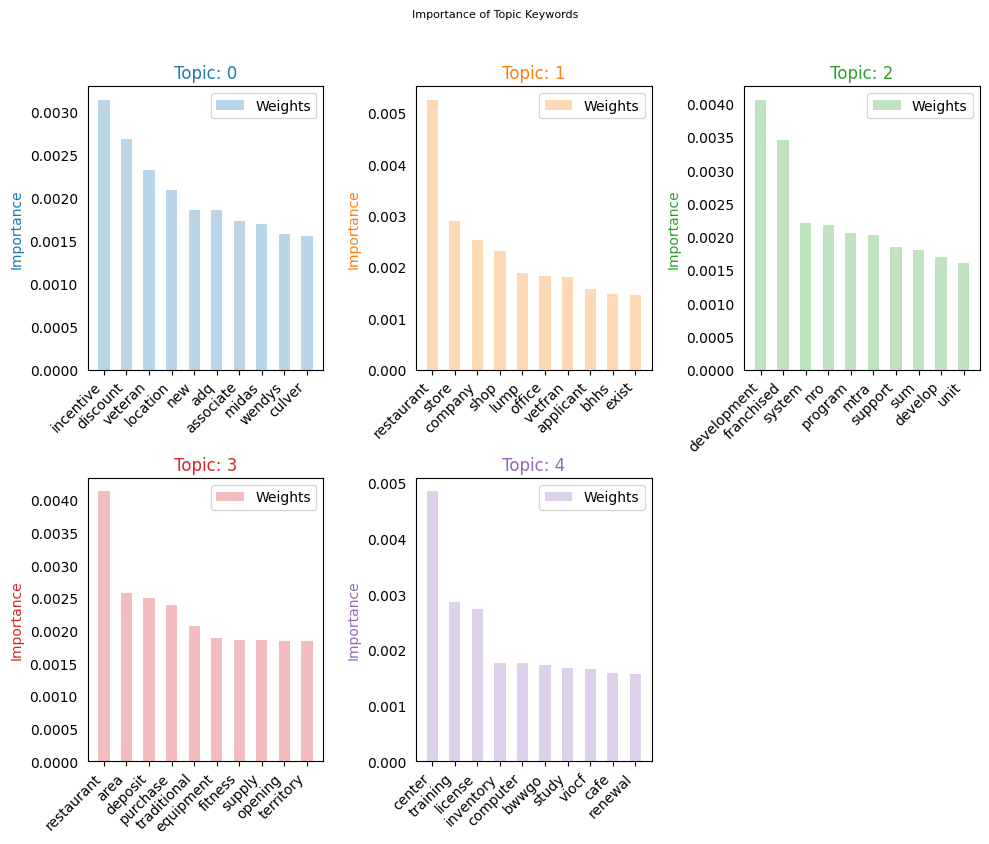

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Assuming 'topics' is a list of tuples (topic_id, list of (word, weight) tuples)
out = []
for topic, word_wt in topics_dict.items():
    for word, weight in word_wt:
        out.append([word, topic, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

# Plot Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=False, sharey=False, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
  if(i<=num_topics):
    topic_df = df.loc[df.topic_id==i, :]
    topic_df = topic_df.sort_values('importance', ascending=False).head(10)  # Top 10 words
    ax.bar(x='word', height="importance", data=topic_df, color=cols[i], width=0.5, alpha=0.3, label='Weights')
    ax.set_ylabel('Importance', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
    ax.legend(loc='upper right')
fig.delaxes(axes[1, 2])
fig.tight_layout()
fig.suptitle('Importance of Topic Keywords', fontsize=8, y=1.05)
plt.show()


## Doc2Vec and KMeans

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans

# --- Step C.1: Doc2Vec Doc/Sentence Embeddings ---
# Tokenizing the text into sentences
documents = [TaggedDocument(words=word_tokenize(text), tags=[str(i)]) for i, text in enumerate(df_files['Text'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=10)

# Generate Doc2Vec embeddings for each sentence
doc2vec_embeddings = [doc2vec_model.dv[str(i)] for i in range(len(df_files['Text']))]

# --- Step C.1a: Apply KMeans for Doc2Vec Clustering ---
# Apply KMeans clustering to Doc2Vec embeddings
kmeans_doc2vec = KMeans(n_clusters=5, random_state=42)
kmeans_doc2vec.fit(doc2vec_embeddings)

# Print clusters from Doc2Vec
print("\nDoc2Vec Clusters (KMeans):")
for i in range(5):
    print(f"Cluster #{i+1}: {[df_files['Text'][j] for j in range(len(df_files['Text'])) if kmeans_doc2vec.labels_[j] == i]}")



Doc2Vec Clusters (KMeans):
Cluster #1: ['ITEM 5 INITIAL FEES Development Fee If you enter into a Development Agreement, you must pay CJR a Development Fee of $10,000 for each Franchised Restaurant you agree to develop at the time you sign the Agreement.  The Development Fee is not refundable. If you execute a Franchise Agreement for a new Franchised Restaurant pursuant to the Development Agreement, the $10,000 Development Fee associated with this new Franchised Restaurant will be credited against the Initial Franchise Fee for such Franchised Restaurant. If you enter into a Development Agreement, you will execute the form of Franchise Agreement in use at the time you enter  CJR-TR –FDD – 05/24  into a lease or sublease for, or take fee title to, the real property upon which the Franchised Restaurant will be developed. Initial Franchise Fee The Initial Franchise Fee is $25,000, although the balance of the Initial Franchise Fee due to CJR is reduced to $15,000 for a Restaurant developed 

In [ ]:
for i in range(5):
    print(f"Cluster #{i+1}: {[file_list[j] for j in range(len(file_list)) if kmeans_doc2vec.labels_[j] == i]}")


Cluster #1: ["46 Carl's Jr..pdf-all_items_item_5.txt", '40 Paris Baguette.pdf-all_items_item_5.txt', '17 Panera Bread.pdf-all_items_item_5.txt', '33 IHOP.pdf-all_items_item_5.txt', '45 Zaxbys.pdf-all_items_item_5.txt', '15 Keller Williams.pdf-all_items_item_5.txt', '39 Jersey Mikes.pdf-all_items_item_5.txt', "22 Papa John's.pdf-all_items_item_5.txt", '19 Dairy Queen.pdf-all_items_item_5.txt', '35 Five Guys.pdf-all_items_item_5.txt', "37 Culver's.pdf-all_items_item_5.txt", "26 Chili's.pdf-all_items_item_5.txt", '44 Home Instead.pdf-all_items_item_5.txt', '38 Wingstop.pdf-all_items_item_5.txt', '18 Popeyes Louisiana Kitchen.pdf-all_items_item_5.txt', '10 Taco Bell.pdf-all_items_item_5.txt', '49 Snap-On Tools.pdf-all_items_item_5.txt', "8 Domino's.pdf-all_items_item_5.txt", '16 Tim Hortons.pdf-all_items_item_5.txt', '4 Burger King.pdf-all_items_item_5.txt', '29 Planet Fitness.pdf-all_items_item_5.txt', '3 KFC.pdf-all_items_item_5.txt', "41 Hardee's.pdf-all_items_item_5.txt", '25 Express E